<a href="https://colab.research.google.com/github/mahfuzaebnatdisha/World-Happiness-Project/blob/main/world_happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from google.colab import drive

In [10]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
df = pd.read_csv('/content/gdrive/My Drive/Data/World-Happiness/2019.csv') 
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [16]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

The data does not have any missing values.

In [17]:
#Renaming columns for easy of coding
df.rename(index = int, columns = {
    "Overall rank":"rank","Country or region": "country","Score": "score","GDP per capita":"gdp",
    "Social support":"social_support","Healthy life expectancy": "life_expectancy", 
    "Freedom to make life choices": "freedom",
    "Generosity": "generosity","Perceptions of corruption": "corruption"},inplace=True)

df.head()

,rank,country,score,gdp,social_support,life_expectancy,freedom,generosity,corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [18]:
df.describe()

,rank,score,gdp,social_support,life_expectancy,freedom,generosity,corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


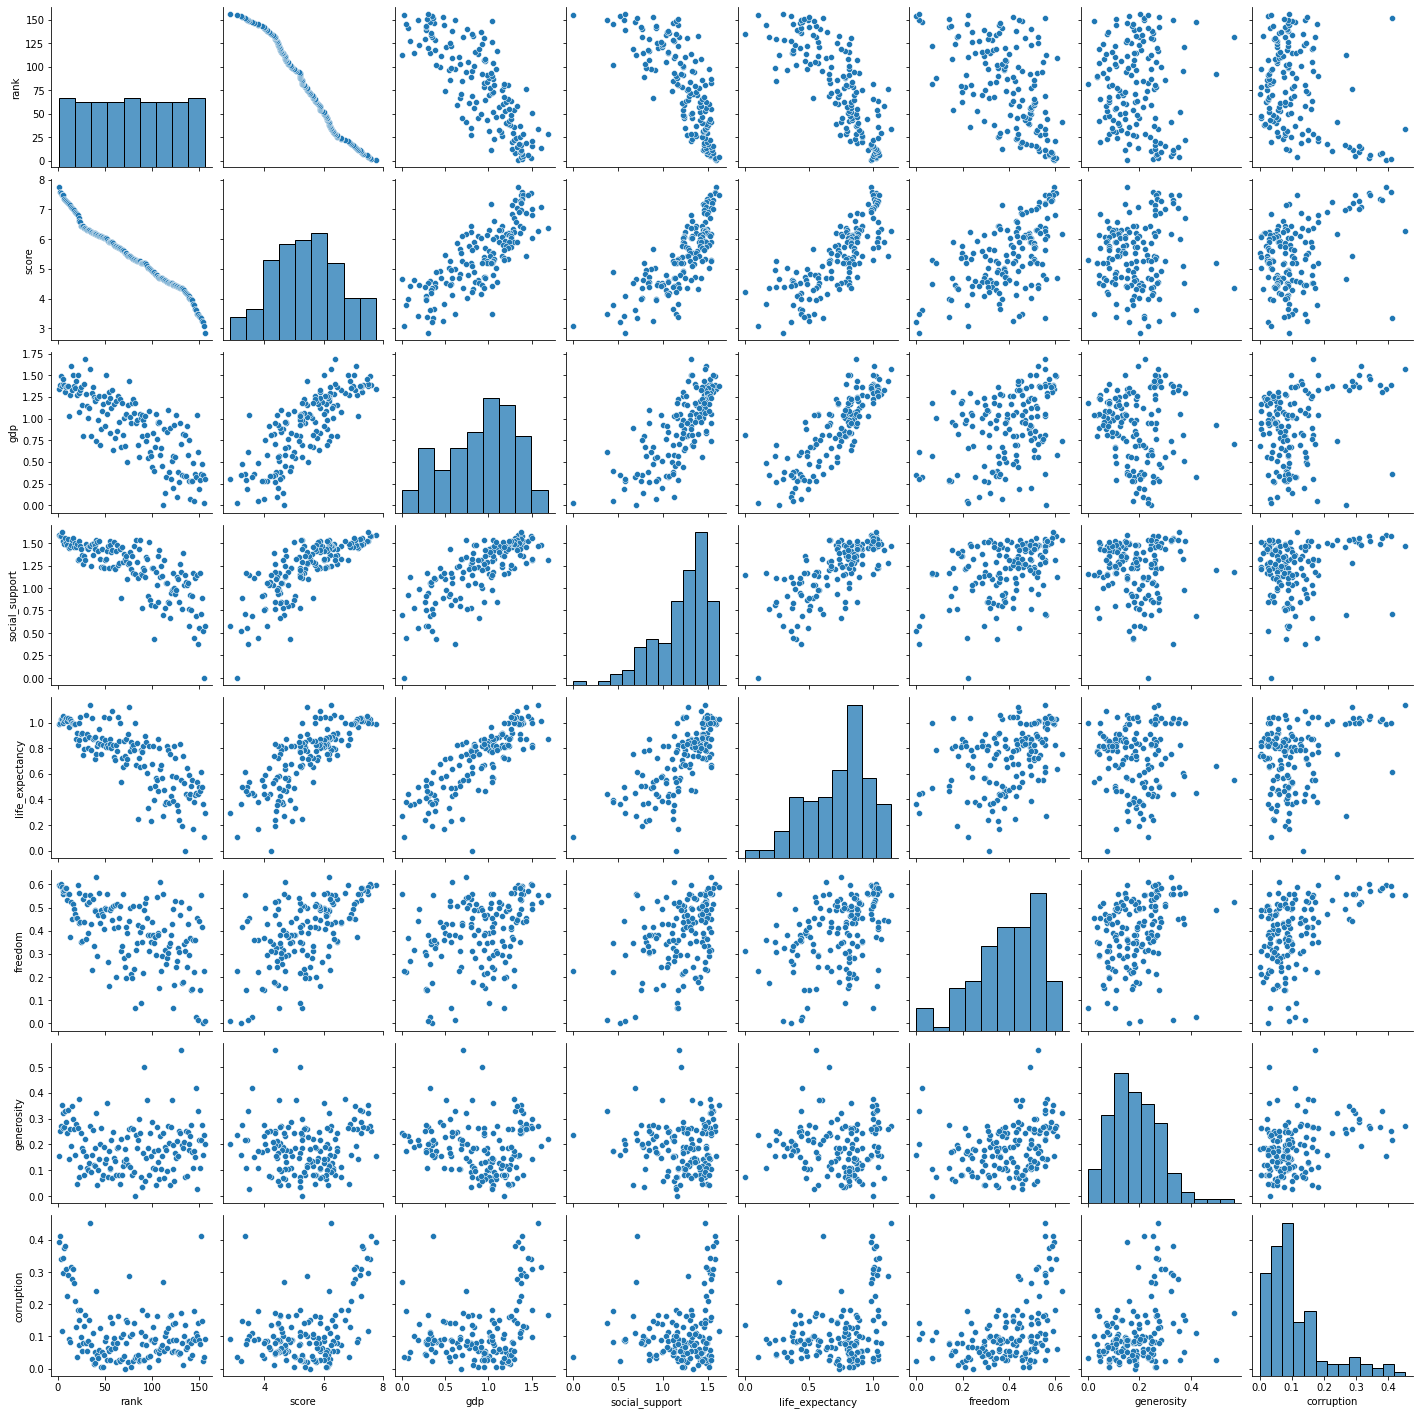

In [19]:
sns.pairplot(df)

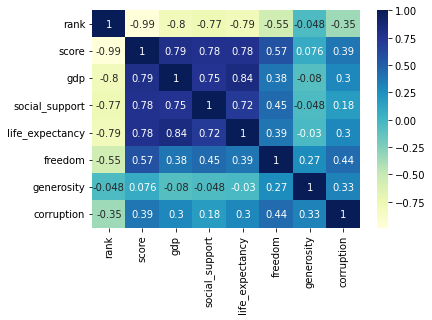

In [20]:
#correlation among the variables
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [21]:
#importing MinMax and StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler


cols = ['gdp','social_support','life_expectancy','freedom','generosity','corruption']
mms = MinMaxScaler()
scaler = StandardScaler()

df_range = mms.fit_transform(df[cols])
df_scaled = pd.DataFrame(scaler.fit_transform(df_range), columns = cols)


In [ ]:
df_scaled.head()

,gdp,social_support,life_expectancy,freedom,generosity,corruption
0,1.095042,1.268098,1.080422,1.424282,-0.335404,2.996757
1,1.203324,1.221154,1.121857,1.396277,0.707265,3.177158
2,1.467734,1.251332,1.254446,1.473292,0.907373,2.444941
3,1.195769,1.392163,1.246159,1.389276,1.781530,0.078500
4,1.236060,1.050146,1.134287,1.151229,1.444506,1.988632


## 1- PCA 

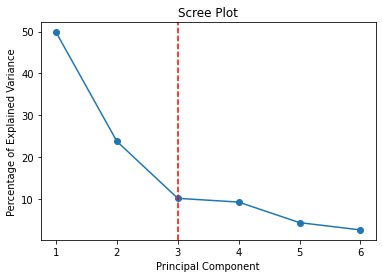

In [22]:
#PCA chossing dimensions
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(df_scaled)

percentage_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
xlabels = ['PC' + str(x) for x in range(1, len(percentage_variance)+1)]

plt.plot(range(1,len(percentage_variance)+1), percentage_variance, '-o')
plt.axvline(x=3, color='red', linestyle='--')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [23]:
pca = PCA(n_components=3,random_state = 7)
PC = pca.fit_transform(df_scaled)
pca_happiness = pd.DataFrame(data = PC,
               columns = ['PC 1', 'PC 2','PC 3'])
 
pca_happiness.head(6)

,PC 1,PC 2,PC 3
0,-3.134226,1.053542,-1.923436
1,-3.292053,1.836057,-1.471747
2,-3.338247,1.537896,-0.788607
3,-2.592776,0.945854,1.538589
4,-2.835104,1.685571,-0.225374
5,-3.168733,1.456708,-0.927163


In [24]:
def biplot(score,n,m,coef,labels=None):
 
    xs = score[:,n]
    ys = score[:,m]
    p = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,
                s=5, 
                color='red')
 
    for i in range(6):
        plt.arrow(0, 0, coef[i,n], 
                  coef[i,m],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,n]* 1.15, 
                 coef[i,m] * 1.15, 
                 labels[i], 
                 color = 'black', 
                 ha = 'center', 
                 va = 'center')
 
    plt.xlabel("PC{}".format(n+1))
    plt.ylabel("PC{}".format(m+1))    
 
 
    plt.figure()

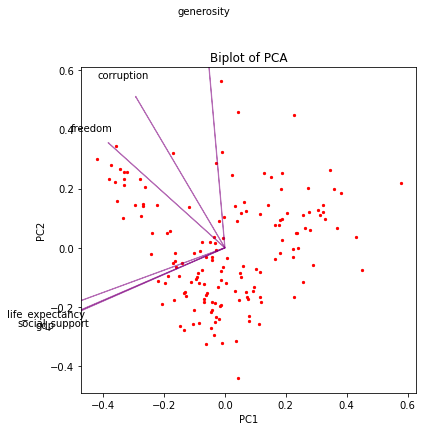

<Figure size 432x288 with 0 Axes>

In [25]:
fig, ax = plt.subplots(figsize = (6,6))
plt.title('Biplot of PCA')
 
biplot(PC,0,1, 
       np.transpose(pca.components_), cols)

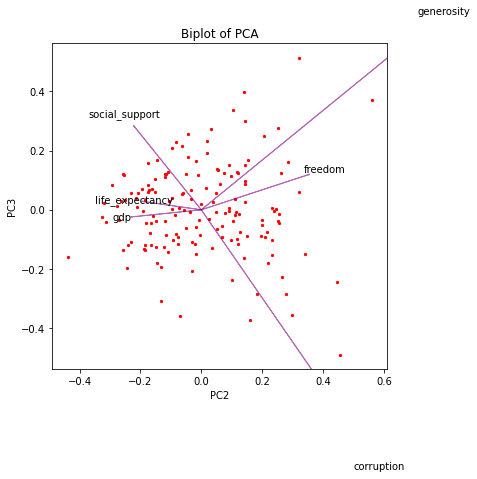

<Figure size 432x288 with 0 Axes>

In [26]:
fig, ax = plt.subplots(figsize = (6,6))
plt.title('Biplot of PCA')
 
biplot(PC,1,2, 
       np.transpose(pca.components_), cols)

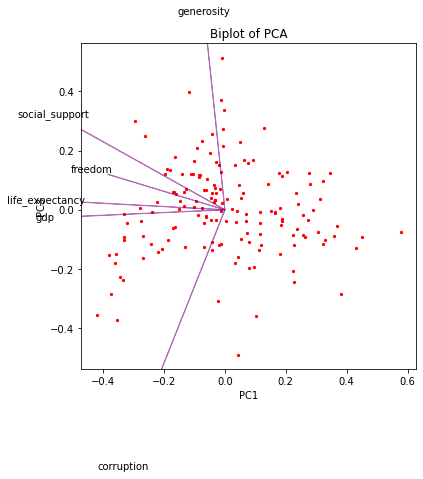

<Figure size 432x288 with 0 Axes>

In [27]:
fig, ax = plt.subplots(figsize = (6,6))
plt.title('Biplot of PCA')
 
biplot(PC,0,2, 
       np.transpose(pca.components_), cols)

## 2- Clustering
#### K-Means

In [28]:
#K-Means choosing n_clusters
from sklearn.cluster import KMeans
wcss = []

WCSS is Within cluster Variation. We want k clusters such that the total WCSS is minimum.

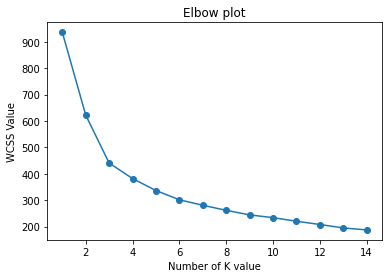

In [29]:
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state = 56)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


plt.plot(range(1,15),wcss,"-o")
plt.title("Elbow plot")
plt.xlabel("Number of K value")
plt.ylabel("WCSS Value")
plt.show()

Selecting 6 as cluster value

In [30]:
#Initialize the class object
kmeans2 = KMeans(n_clusters= 7, random_state = 63)
 
#predict the labels of clusters.
label = kmeans2.fit_predict(df_scaled)

#the centre of the clusters
centroids = kmeans2.cluster_centers_

In [31]:
labels = kmeans2.labels_
country = df["country"]
Kclusters = pd.DataFrame(zip(country, labels), columns=['Country', 'Subgroup'])
kmeans2.feature_names_in_

array(['gdp', 'social_support', 'life_expectancy', 'freedom',
       'generosity', 'corruption'], dtype=object)

In [32]:
#observing the clusters by country
#Kclusters.head()
Kclusters[Kclusters['Subgroup'] == 0]

,Country,Subgroup
66,Pakistan,0
84,Nigeria,0
95,Cameroon,0
97,Ghana,0
98,Ivory Coast,0
102,Congo (Brazzaville),0
110,Senegal,0
111,Somalia,0
113,Niger,0
114,Burkina Faso,0


In [33]:
Kclusters[Kclusters['Subgroup'] == 1]

,Country,Subgroup
11,Costa Rica,1
12,Israel,1
17,Belgium,1
18,United States,1
19,Czech Republic,1
23,France,1
24,Taiwan,1
25,Chile,1
27,Saudi Arabia,1
28,Qatar,1


In [34]:
Kclusters[Kclusters['Subgroup'] == 2]

,Country,Subgroup
101,Benin,2
131,Chad,2
138,Togo,2
141,Comoros,2
144,Burundi,2
146,Haiti,2
148,Syria,2
153,Afghanistan,2
154,Central African Republic,2
155,South Sudan,2


Text(0.5, 1.0, 'K-means clusters')

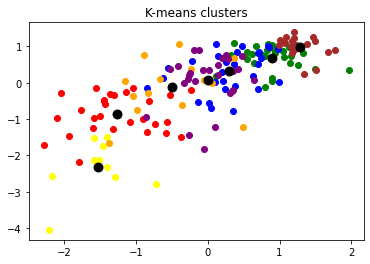

In [35]:
#Creating dataframes based on the labels
label_0 = df_scaled[label == 0]
label_1 = df_scaled[label == 1]
label_2 = df_scaled[label == 2]
label_3 = df_scaled[label == 3]
label_4 = df_scaled[label == 4]
label_5 = df_scaled[label == 5]
label_6 = df_scaled[label == 6]

#Ploting the kmeans
plt.scatter(label_0[cols[0]], label_0[cols[1]], color = 'red')
plt.scatter(label_1[cols[0]], label_1[cols[1]], color = 'green')
plt.scatter(label_2[cols[0]], label_2[cols[1]], color = 'yellow')
plt.scatter(label_3[cols[0]], label_3[cols[1]], color = 'blue')
plt.scatter(label_4[cols[0]], label_4[cols[1]], color = 'orange')
plt.scatter(label_5[cols[0]], label_5[cols[1]], color = 'brown')
plt.scatter(label_6[cols[0]], label_6[cols[1]], color = 'purple')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.title("K-means clusters")

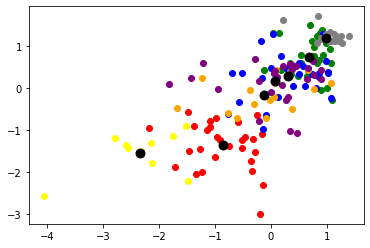

In [36]:
#this plot gives a differnt view of the clusters
plt.scatter(label_0[cols[1]], label_0[cols[2]], color = 'red')
plt.scatter(label_1[cols[1]], label_1[cols[2]], color = 'green')
plt.scatter(label_2[cols[1]], label_2[cols[2]], color = 'yellow')
plt.scatter(label_3[cols[1]], label_3[cols[2]], color = 'blue')
plt.scatter(label_4[cols[1]], label_4[cols[2]], color = 'orange')
plt.scatter(label_5[cols[1]], label_5[cols[2]], color = 'grey')
plt.scatter(label_6[cols[1]], label_6[cols[2]], color = 'purple')
plt.scatter(centroids[:,1] , centroids[:,2] , s = 80, color = 'k')

### Hierarchial Clustering

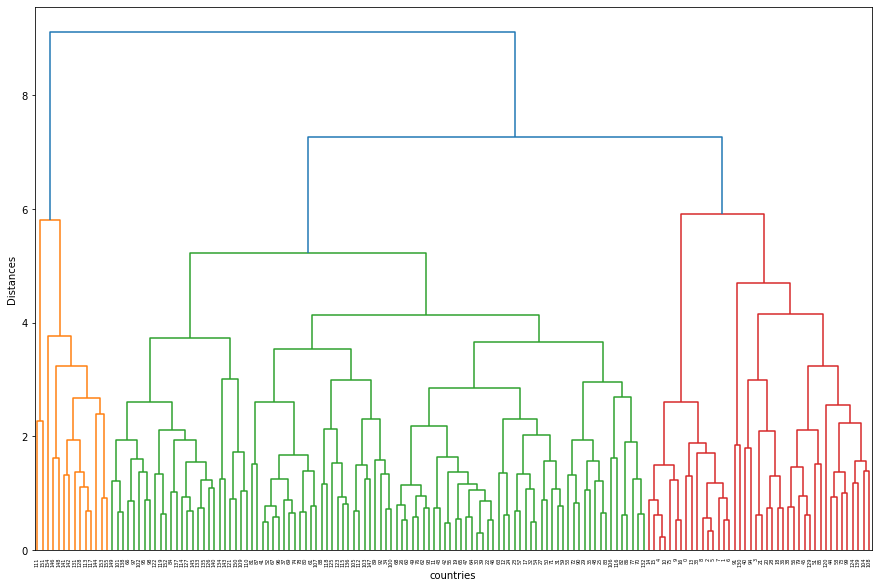

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram

fig,ax = plt.subplots(figsize = (15,10))
merg = linkage(df_scaled, method = "complete")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("countries")
plt.ylabel("Distances")
plt.show()

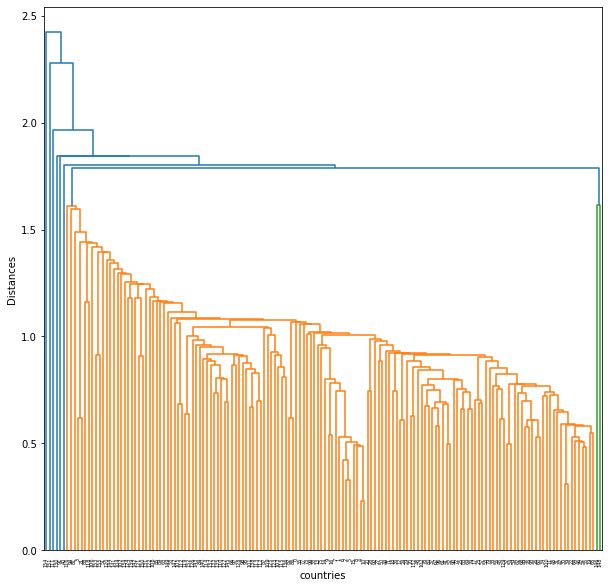

In [38]:


fig,ax = plt.subplots(figsize = (10,10))
merg = linkage(df_scaled, method = "single")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("countries")
plt.ylabel("Distances")
plt.show()

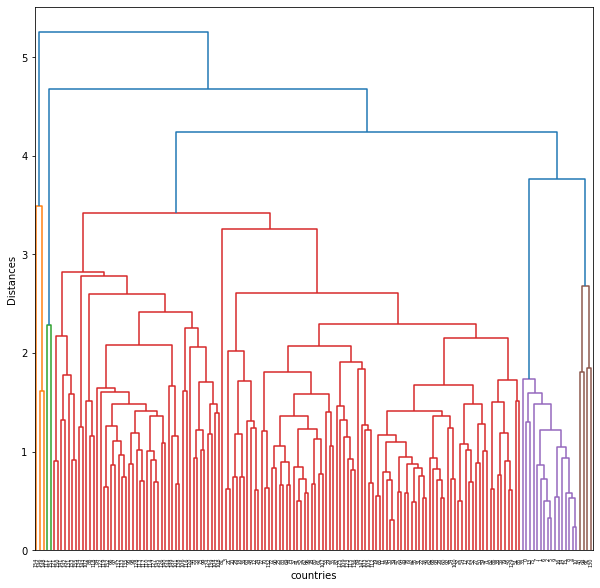

In [39]:


fig,ax = plt.subplots(figsize = (10,10))
merg = linkage(df_scaled, method = "average")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("countries")
plt.ylabel("Distances")
plt.show()

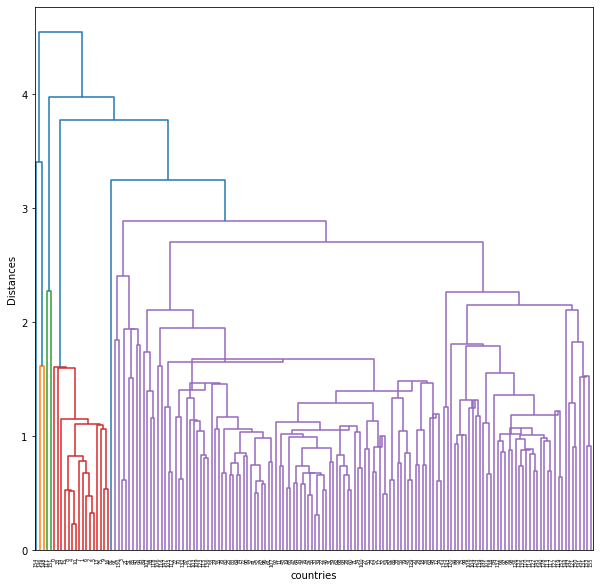

In [40]:


fig,ax = plt.subplots(figsize = (10,10))
merg = linkage(df_scaled, method = "centroid")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("countries")
plt.ylabel("Distances")
plt.show()